In [1]:
from utils import sample, retrieve, cumulative_mean, rmse
from dirichlet_symmetric_utils import get_dirichlet_symmetric_rmse, get_dirichlet_symmetric_params
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transforms = ['stan', 'stickbreaking', 'softmax', 'softmax-augmented']
# for transform in transforms:
#     sample(transform_category="simplex", transform=transform, evaluating_model="dirichlet_symmetric", 
#            parameters={}, auto_eval_all_params=True, n_iter = 1000, n_chains = 4, n_repeat = 1)

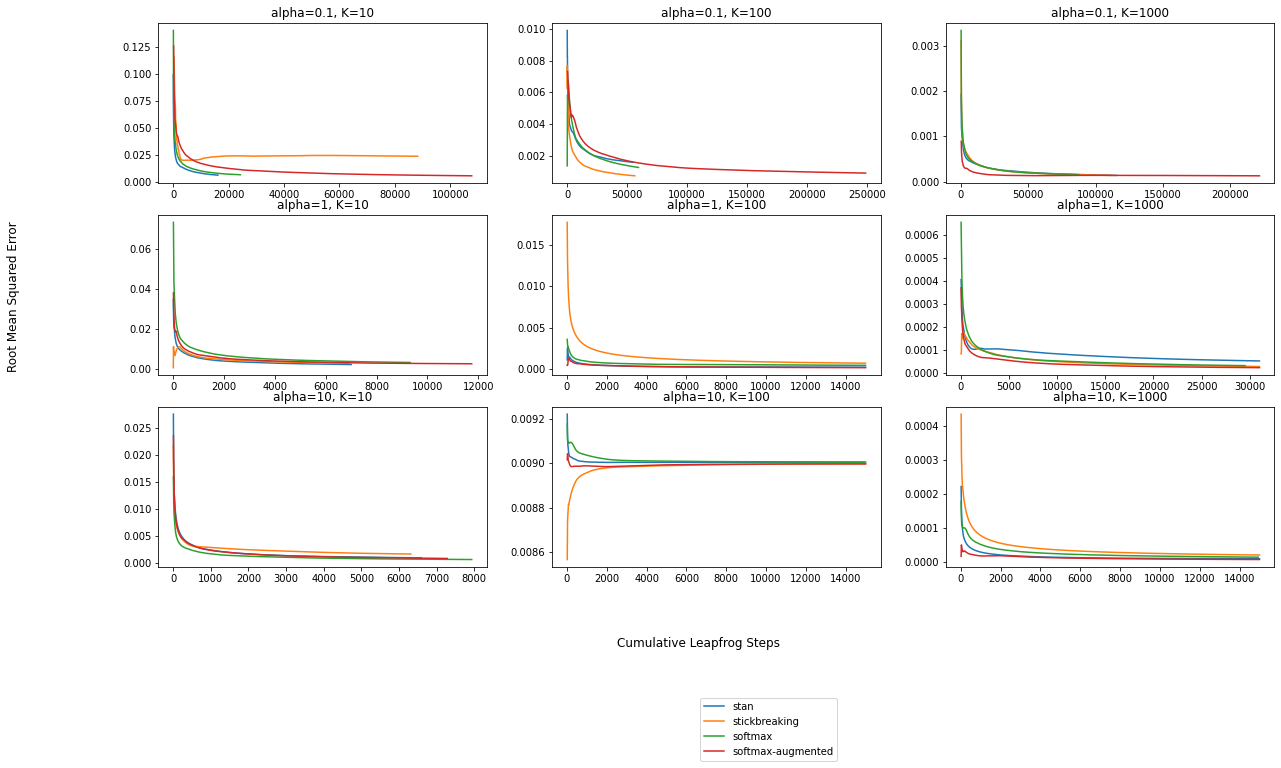

In [5]:
plt.rcParams["figure.figsize"] = (20,10)

fig, axes = plt.subplots(3,3)

fig.supxlabel('Cumulative Leapfrog Steps')
fig.supylabel('Root Mean Squared Error')

for ax, params in zip(axes.flatten(),  get_dirichlet_symmetric_params()):
    for transform in transforms:
        x, y = get_dirichlet_symmetric_rmse(transform, params)
        ax.plot(x,y, label = str(transform))
    ax.set_title(f'alpha={params["alpha"][0]}, K={params["K"]}')

fig.legend(labels=transforms,bbox_to_anchor = (0.6, -0.05));
fig.savefig(str('figure.png'))